# 1 Final Project Submission 

- name: Leticia D Fernandes
- pace: Part time
- Scheduled project review data/time: July 15th, 2021, 08:30 AM (Mountain Time)
- Course Instructor: Abhineet
- Blog post URL: https://callableleticia.blog/2021/07/12/1st-phase-project-flatiron-school/
- GitHub repository: https://github.com/lddrasler?tab=repositories

In this project we are helping to advise Microsoft in their new venture into movie prodution.

1. Popular genres of movies (movies that achieved a high value in and outside of the United States)

2. Best producers (Studios that achieved the most profitable return and the most popular overall)

3. Most popular writers

In [1]:
import pandas as pd
import numpy as np
import os
import re
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
os.chdir('zippedData')
csv_files = glob("*.csv.gz")

## Undarstanding and Analyzing data 

In [3]:
csv_dict = {os.path.basename(file).replace(".csv","").replace(".","_"):pd.read_csv(file) for file in csv_files }

In [4]:
df_titles=csv_dict['imdb_title_basics_gz']
df_ratings=csv_dict['imdb_title_ratings_gz']
df_bom_gross=csv_dict['bom_movie_gross_gz']

In [5]:
df_bom_gross['foreign_gross']=df_bom_gross['foreign_gross'].str.replace(",","")

In [6]:
df_bom_gross['foreign_gross']=df_bom_gross['foreign_gross'].fillna(value = 0)

In [7]:
df_bom_gross=df_bom_gross.dropna()

In [8]:
df_bom_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3356 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3356 non-null   object 
 1   studio          3356 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   foreign_gross   3356 non-null   object 
 4   year            3356 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 157.3+ KB


## Most popular movies based on total gross

In [9]:
df_bom_gross.loc[:,'foreign_gross']=df_bom_gross.loc[:,'foreign_gross'].astype(float)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [10]:
df_bom_gross.loc[:,'total_gross']=df_bom_gross.loc[:,'domestic_gross']+df_bom_gross.loc[:,'foreign_gross']

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [11]:
top_grossing_films=df_bom_gross.sort_values('total_gross',ascending=False)[0:25]

Text(0, 0.5, 'Movie Titles')

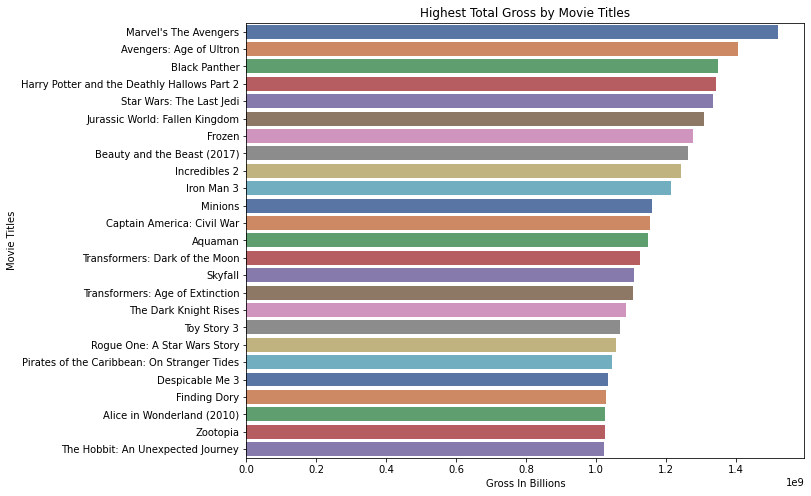

In [12]:
plt.figure(figsize=(10,8))
plt.title('Highest Total Gross by Movie Titles')
sns.barplot(y= "title",x="total_gross",data=top_grossing_films, palette ="deep")
plt.xlabel("Gross In Billions")
plt.ylabel("Movie Titles")

#### In this plot we have the 25 top grossing movies. So far it does not tell us much, But we could assume that the highest total gross are the most popular watched movies in the world according to our data.

In [13]:
studio_data=df_bom_gross.groupby(by='studio').agg(['median','sum'])

In [14]:
studio_data['total_gross']

,median,sum
studio,,
3D,16000000.0,16000000.0
A23,82100.0,164200.0
A24,3000000.0,562656400.0
ADC,124100.0,248200.0
AF,354500.0,5642900.0
...,...,...
XL,229000.0,458000.0
YFG,1100000.0,1100000.0
Yash,2300000.0,304392100.0


In [15]:
top_grossing_studio=studio_data.sort_values(by=('total_gross', 'sum'),ascending = False)[0:10]

In [16]:
top_grossing_studio=top_grossing_studio.reset_index()

Text(0, 0.5, 'Studios')

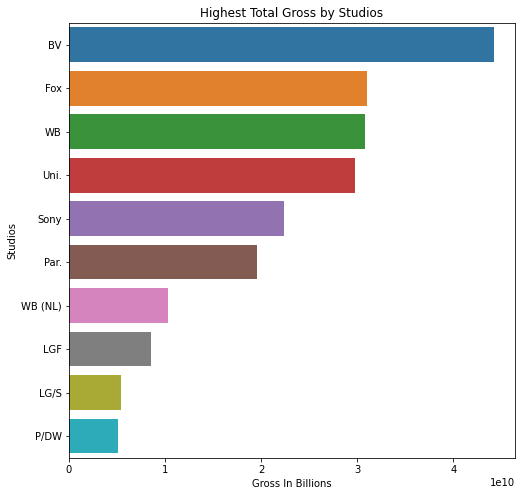

In [17]:
plt.figure(figsize=(8,8))
sns.barplot(y="studio",x=("total_gross","sum"),data=top_grossing_studio)
plt.title('Highest Total Gross by Studios')
plt.xlabel("Gross In Billions")
plt.ylabel("Studios")

#### Based on the highest total gross movies I am able to find the most popular studios in the plot above.

# 1.0 Most popular writers based on votes

In [18]:
df_imdb_title_ratings=csv_dict['imdb_title_ratings_gz'].reset_index()
df_imdb_title_crew=csv_dict['imdb_title_crew_gz'].reset_index()
df_imdb_title_basics=csv_dict['imdb_title_basics_gz'].reset_index()
df_imdb_name_basics=csv_dict['imdb_name_basics_gz'].reset_index()

In [19]:
df_imdb_movie_crew = pd.merge(df_imdb_title_crew,df_imdb_title_basics,left_on='tconst',right_on='tconst',how='inner')
df_imdb_movie_crew.head()

,index_x,tconst,directors,writers,index_y,primary_title,original_title,start_year,runtime_minutes,genres
0,0,tt0285252,nm0899854,nm0899854,30,Life's a Beach,Life's a Beach,2012,100.0,Comedy
1,1,tt0438973,NaN,"nm0175726,nm1802864",109,Sealand,Sealand,2019,NaN,"Biography,Drama"
2,2,tt0462036,nm1940585,nm1940585,151,Steve Phoenix: The Untold Story,Steve Phoenix: The Untold Story,2012,110.0,Drama
3,3,tt0835418,nm0151540,"nm0310087,nm0841532",331,The Babymakers,The Babymakers,2012,95.0,Comedy
4,4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943,399,Bulletface,Bulletface,2010,82.0,Thriller


In [20]:
df_imdb_movie_crew_ratings=pd.merge(df_imdb_movie_crew,df_imdb_title_ratings,
                                    left_on='tconst',right_on='tconst',how='inner')
df_imdb_movie_crew_ratings.head()

,index_x,tconst,directors,writers,index_y,primary_title,original_title,start_year,runtime_minutes,genres,index,averagerating,numvotes
0,0,tt0285252,nm0899854,nm0899854,30,Life's a Beach,Life's a Beach,2012,100.0,Comedy,70021,3.9,219
1,2,tt0462036,nm1940585,nm1940585,151,Steve Phoenix: The Untold Story,Steve Phoenix: The Untold Story,2012,110.0,Drama,70024,5.5,18
2,3,tt0835418,nm0151540,"nm0310087,nm0841532",331,The Babymakers,The Babymakers,2012,95.0,Comedy,70025,5.0,8147
3,4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943,399,Bulletface,Bulletface,2010,82.0,Thriller,70026,5.8,875
4,5,tt0879859,nm2416460,NaN,404,Torn,Torn,2010,NaN,Thriller,70027,6.8,21


In [21]:
df_imdb_movie_crew_ratings.drop(['index_x','index_y','index','original_title'],axis=1,inplace=True)
df_imdb_movie_crew_ratings.head()

,tconst,directors,writers,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0285252,nm0899854,nm0899854,Life's a Beach,2012,100.0,Comedy,3.9,219
1,tt0462036,nm1940585,nm1940585,Steve Phoenix: The Untold Story,2012,110.0,Drama,5.5,18
2,tt0835418,nm0151540,"nm0310087,nm0841532",The Babymakers,2012,95.0,Comedy,5.0,8147
3,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943,Bulletface,2010,82.0,Thriller,5.8,875
4,tt0879859,nm2416460,NaN,Torn,2010,NaN,Thriller,6.8,21


In [22]:
df_imdb_movie_crew_ratings.dropna(subset=['writers'],inplace=True)
df_imdb_movie_crew_ratings['writers']=df_imdb_movie_crew_ratings['writers'].apply(lambda x: x.split(",")[0])
df_imdb_movie_crew_ratings.head()

,tconst,directors,writers,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0285252,nm0899854,nm0899854,Life's a Beach,2012,100.0,Comedy,3.9,219
1,tt0462036,nm1940585,nm1940585,Steve Phoenix: The Untold Story,2012,110.0,Drama,5.5,18
2,tt0835418,nm0151540,nm0310087,The Babymakers,2012,95.0,Comedy,5.0,8147
3,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943,Bulletface,2010,82.0,Thriller,5.8,875
5,tt0996958,nm2286991,nm2286991,Legend of the Red Reaper,2013,99.0,"Action,Adventure,Fantasy",2.2,495


In [23]:
df_imdb_movie_crew_ratings_sorted = df_imdb_movie_crew_ratings[
    df_imdb_movie_crew_ratings.numvotes>=36000].sort_values(['numvotes'],ascending=False)


df_imdb_movie_crew_ratings_sorted.head()

,tconst,directors,writers,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
58624,tt1375666,nm0634240,nm0634240,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
5562,tt1345836,nm0634240,nm0634300,The Dark Knight Rises,2012,164.0,"Action,Thriller",8.4,1387769
65942,tt0816692,nm0634240,nm0634300,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334
27589,tt1853728,nm0000233,nm0000233,Django Unchained,2012,165.0,"Drama,Western",8.4,1211405
71146,tt0848228,nm0923736,nm0923736,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",8.1,1183655


In [24]:
df_imdb_movie_crew_ratings=pd.merge(
    df_imdb_movie_crew_ratings_sorted,df_imdb_name_basics,left_on='directors', right_on='nconst', how='left').drop([
    'nconst','birth_year','death_year','primary_profession','known_for_titles','index'],axis=1)

df_imdb_movie_crew_ratings['directors']=df_imdb_movie_crew_ratings['primary_name']

df_imdb_movie_crew_ratings.drop(['primary_name'],axis=1, inplace=True)

df_imdb_movie_crew_ratings=pd.merge(
    df_imdb_movie_crew_ratings,df_imdb_name_basics,left_on='writers',right_on='nconst',
    how='left').drop(['nconst','birth_year','death_year','primary_profession','known_for_titles','index'],axis=1)

df_imdb_movie_crew_ratings['writers']=df_imdb_movie_crew_ratings['primary_name']
df_imdb_movie_crew_ratings.drop(['primary_name'],axis=1,inplace=True)

In [25]:
df_imdb_title_aka_US=csv_dict[
    'imdb_title_akas_gz'][csv_dict['imdb_title_akas_gz'].region=='US'].drop([
    'ordering','title','types','attributes','is_original_title','language'],axis=1)

df_imdb_movie_crew_ratings = pd.merge(
    df_imdb_movie_crew_ratings,df_imdb_title_aka_US,left_on='tconst',right_on='title_id',
    how='left').drop(['title_id'],axis=1)

df_imdb_movie_crew_ratings=df_imdb_movie_crew_ratings[df_imdb_movie_crew_ratings.region =='US']

df_imdb_movie_crew_ratings

,tconst,directors,writers,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,region
0,tt1375666,Christopher Nolan,Christopher Nolan,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,US
1,tt1375666,Christopher Nolan,Christopher Nolan,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,US
2,tt1375666,Christopher Nolan,Christopher Nolan,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,US
3,tt1375666,Christopher Nolan,Christopher Nolan,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,US
4,tt1345836,Christopher Nolan,Jonathan Nolan,The Dark Knight Rises,2012,164.0,"Action,Thriller",8.4,1387769,US
...,...,...,...,...,...,...,...,...,...,...
2114,tt1658837,Pascal Laugier,Pascal Laugier,The Tall Man,2012,106.0,"Crime,Drama,Horror",5.9,36331,US
2116,tt2938956,Camille Delamarre,Adam Cooper,The Transporter Refueled,2015,96.0,"Action,Adventure,Crime",5.2,36201,US
2117,tt2938956,Camille Delamarre,Adam Cooper,The Transporter Refueled,2015,96.0,"Action,Adventure,Crime",5.2,36201,US
2118,tt3165612,Leslye Headland,Leslye Headland,Sleeping with Other People,2015,101.0,"Comedy,Drama,Romance",6.5,36105,US


In [26]:
df_top_writer = df_imdb_movie_crew_ratings.groupby(
    by="writers").agg('median').sort_values('numvotes', ascending=False).reset_index()[0:20]

df_top_writer=df_top_writer.sort_values('averagerating',ascending=False)

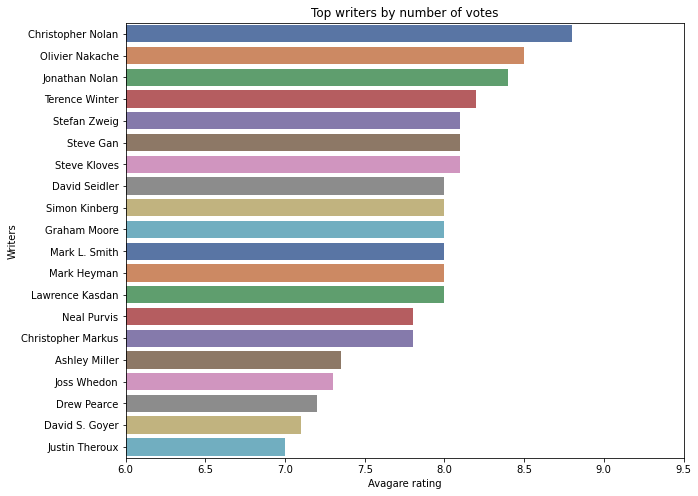

In [75]:
plt.figure(figsize=(10,8))
a = sns.barplot(y="writers",x="averagerating",data=df_top_writer, palette ="deep")
a.set(xlim=(6,9.5))
plt.title('Top writers by number of votes')
plt.xlabel("Avagare rating")
plt.ylabel("Writers")
plt.savefig('topwriters.png')

In [74]:
pwd

'C:\\Users\\letic\\Documents\\Flatiron\\dsc-phase-1-project'

# 1.1 RECOMMENDATION


##### I was able to find the most popular writer based on number of votes. My code selects writers who had the numbers of votes greater than 36.000. Based on this information I would recommend Microft to work with one of top writers on the plot above.

# 2.0 Top directors based on average rating

In [64]:
df_top_director = df_imdb_movie_crew_ratings.groupby(
    by="directors").agg('median').sort_values('numvotes',ascending=False).reset_index()[0:25]

df_top_director['mod_numvotes']=df_top_director['numvotes']/1000000
df_top_director


,directors,start_year,runtime_minutes,averagerating,numvotes,mod_numvotes
0,Christopher Nolan,2012.0,164.0,8.40,1387769.0,1.387769
1,Tim Miller,2016.0,108.0,8.00,820847.0,0.820847
2,George Miller,2015.0,120.0,8.10,780910.0,0.780910
3,Lee Unkrich,2010.0,103.0,8.30,682218.0,0.682218
4,Joe Johnston,2011.0,124.0,6.90,668137.0,0.668137
5,Joss Whedon,2015.0,141.0,7.30,665594.0,0.665594
6,Jon Favreau,2010.0,124.0,7.00,657690.0,0.657690
7,Martin Scorsese,2011.0,138.0,7.80,645414.5,0.645415
8,Zack Snyder,2013.0,143.0,6.50,576909.0,0.576909
9,Alejandro G. Iñárritu,2014.5,137.5,7.85,570305.0,0.570305


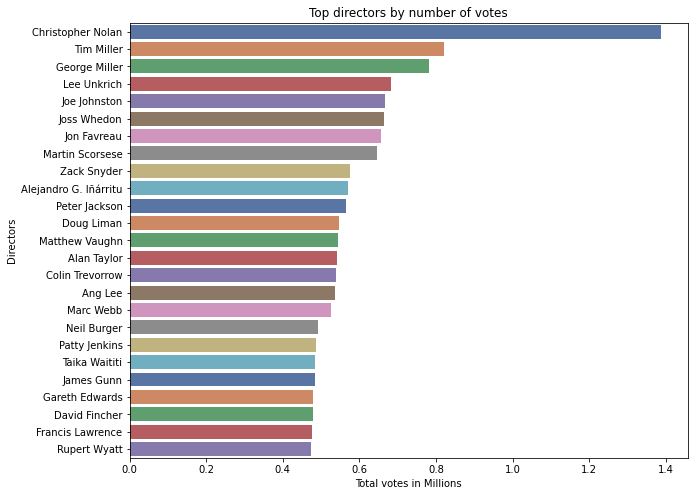

In [72]:
plt.figure(figsize=(10,8))
sns.barplot(y="directors",x="mod_numvotes",data=df_top_director, palette = 'deep')
plt.title('Top directors by number of votes')
plt.xlabel("Total votes in Millions")
plt.ylabel("Directors")

plt.savefig("topdirect.png")


#    2.1 Recommendation

##### Based on average rating I was able to find the best directors. On the plot above you are able to see the 25 directors with the best rating. I would recommend Microsft to work with the top 10 best rated from this plot.

# 3.0 Most popular genres

In [30]:
df_imdb_movie_crew_ratings_sorted['genres']=df_imdb_movie_crew_ratings_sorted['genres'].apply(lambda x:x.split(","))

In [31]:
genre_hist_data=pd.Series(df_imdb_movie_crew_ratings_sorted['genres'].iloc[0:50].apply(pd.Series).stack().values)

In [32]:
set(genre_hist_data)

{'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'Western'}

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


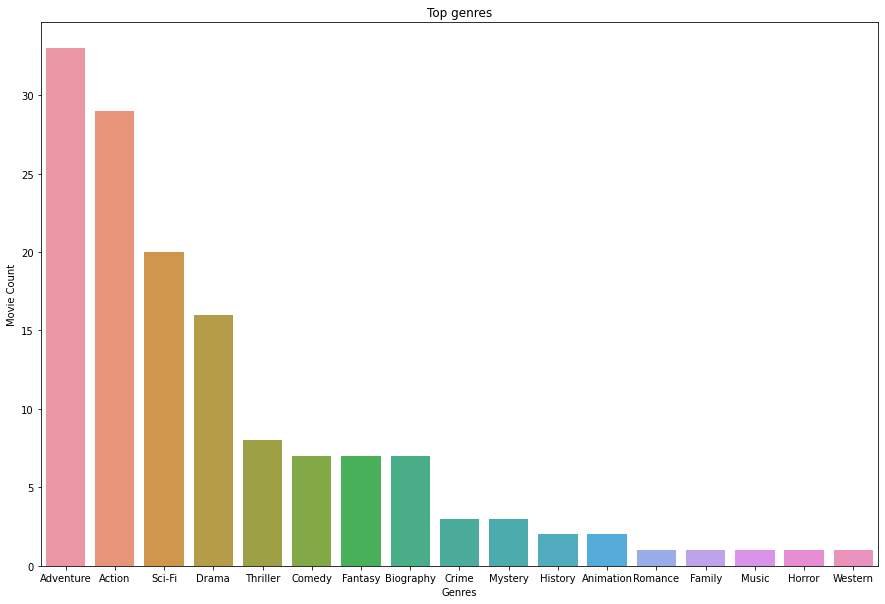

In [71]:
plt.figure(figsize=(15,10))
sns.countplot(genre_hist_data,order = genre_hist_data.value_counts().index)
plt.title('Top genres')
plt.xlabel("Genres")
plt.ylabel("Movie Count");

plt.savefig("genres.png")

# 3.1 Recommendation 

##### I could analyze based on rating the most popular genres. I would recommend Microsoft to focus on productions based on most popular genres . As we are able to see in this plot adventure is one of the most rated genre.

# 4.0 Studios with most profitable returns 

In [34]:
df_profit=pd.merge(csv_dict[
    'tn_movie_budgets_gz'],df_imdb_movie_crew_ratings,left_on='movie',
                   right_on='primary_title',how='inner').drop([
    'movie','domestic_gross','release_date','start_year','id','runtime_minutes'],axis=1)

In [35]:
df_profit['production_budget']=df_profit['production_budget'].str.replace(",","").str.replace("$","").astype(float)

<ipython-input-35-22fafa97ae08>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_profit['production_budget']=df_profit['production_budget'].str.replace(",","").str.replace("$","").astype(float)


In [36]:
df_profit['worldwide_gross']=df_profit['worldwide_gross'].str.replace(",","").str.replace("$","").astype(float)

<ipython-input-36-8e978b20d10d>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_profit['worldwide_gross']=df_profit['worldwide_gross'].str.replace(",","").str.replace("$","").astype(float)


In [37]:
df_profit['total_profit'] = (df_profit['worldwide_gross'] - df_profit['production_budget'])/df_profit['production_budget']

In [38]:
df_profit

,production_budget,worldwide_gross,tconst,directors,writers,primary_title,genres,averagerating,numvotes,region,total_profit
0,410600000.0,1.045664e+09,tt1298650,Rob Marshall,Ted Elliott,Pirates of the Caribbean: On Stranger Tides,"Action,Adventure,Fantasy",6.6,447624,US,1.546673
1,410600000.0,1.045664e+09,tt1298650,Rob Marshall,Ted Elliott,Pirates of the Caribbean: On Stranger Tides,"Action,Adventure,Fantasy",6.6,447624,US,1.546673
2,410600000.0,1.045664e+09,tt1298650,Rob Marshall,Ted Elliott,Pirates of the Caribbean: On Stranger Tides,"Action,Adventure,Fantasy",6.6,447624,US,1.546673
3,330600000.0,1.403014e+09,tt2395427,Joss Whedon,Joss Whedon,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",7.3,665594,US,3.243841
4,330600000.0,1.403014e+09,tt2395427,Joss Whedon,Joss Whedon,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",7.3,665594,US,3.243841
...,...,...,...,...,...,...,...,...,...,...,...
1645,420000.0,4.370020e+05,tt2359024,Jeremy Saulnier,Jeremy Saulnier,Blue Ruin,"Crime,Drama,Thriller",7.1,58811,US,0.040481
1646,420000.0,4.370020e+05,tt2359024,Jeremy Saulnier,Jeremy Saulnier,Blue Ruin,"Crime,Drama,Thriller",7.1,58811,US,0.040481
1647,250000.0,3.728400e+06,tt1758692,Drake Doremus,Drake Doremus,Like Crazy,"Drama,Romance",6.7,55841,US,13.913600
1648,175000.0,2.102779e+06,tt1549572,Mike Cahill,Mike Cahill,Another Earth,"Drama,Romance,Sci-Fi",7.0,85839,US,11.015880


In [39]:
df_most_profit = pd.merge(df_profit,df_bom_gross,left_on='primary_title',right_on='title',how='inner')

In [40]:
df_most_profit.drop(['domestic_gross', 'foreign_gross', 'total_gross' ], axis=1)

,production_budget,worldwide_gross,tconst,directors,writers,primary_title,genres,averagerating,numvotes,region,total_profit,title,studio,year
0,410600000.0,1.045664e+09,tt1298650,Rob Marshall,Ted Elliott,Pirates of the Caribbean: On Stranger Tides,"Action,Adventure,Fantasy",6.6,447624,US,1.546673,Pirates of the Caribbean: On Stranger Tides,BV,2011
1,410600000.0,1.045664e+09,tt1298650,Rob Marshall,Ted Elliott,Pirates of the Caribbean: On Stranger Tides,"Action,Adventure,Fantasy",6.6,447624,US,1.546673,Pirates of the Caribbean: On Stranger Tides,BV,2011
2,410600000.0,1.045664e+09,tt1298650,Rob Marshall,Ted Elliott,Pirates of the Caribbean: On Stranger Tides,"Action,Adventure,Fantasy",6.6,447624,US,1.546673,Pirates of the Caribbean: On Stranger Tides,BV,2011
3,330600000.0,1.403014e+09,tt2395427,Joss Whedon,Joss Whedon,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",7.3,665594,US,3.243841,Avengers: Age of Ultron,BV,2015
4,330600000.0,1.403014e+09,tt2395427,Joss Whedon,Joss Whedon,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",7.3,665594,US,3.243841,Avengers: Age of Ultron,BV,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1365,900000.0,1.754964e+07,tt2334649,Ryan Coogler,Ryan Coogler,Fruitvale Station,"Biography,Drama,Romance",7.5,68187,US,18.499606,Fruitvale Station,Wein.,2013
1366,750000.0,4.422318e+06,tt1862079,Colin Trevorrow,Derek Connolly,Safety Not Guaranteed,"Comedy,Drama,Romance",7.0,111907,US,4.896424,Safety Not Guaranteed,FD,2012
1367,250000.0,3.728400e+06,tt1758692,Drake Doremus,Drake Doremus,Like Crazy,"Drama,Romance",6.7,55841,US,13.913600,Like Crazy,ParV,2011
1368,175000.0,2.102779e+06,tt1549572,Mike Cahill,Mike Cahill,Another Earth,"Drama,Romance,Sci-Fi",7.0,85839,US,11.015880,Another Earth,FoxS,2011


In [41]:
df_total_return= df_most_profit.groupby(
    by='studio').agg('median').sort_values('total_profit',ascending=False).reset_index().iloc[0:20]

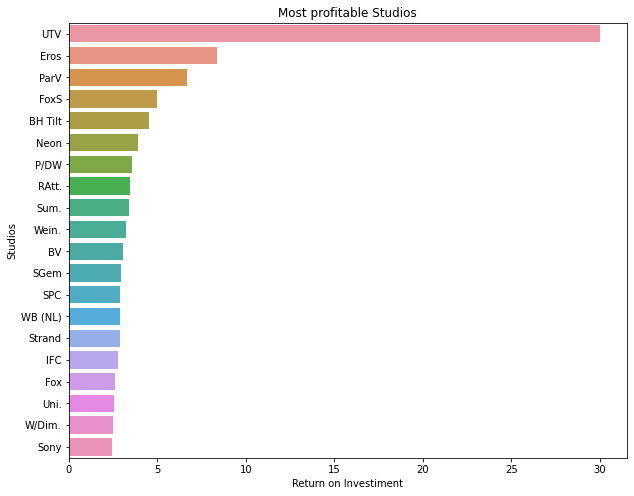

In [78]:
plt.figure(figsize=(10,8))
sns.barplot(y="studio",x="total_profit",data=df_total_return)
plt.title('Most profitable Studios')
plt.xlabel("Return on Investiment")
plt.ylabel("Studios");

plt.savefig("studiosprof.png")

# 4.1 Recommendation 

##### Based  on the data, I was able to analyze the studios return. In other words, I was able to undarstand how much money the studios earned after a big prodution and subtract their budget. Which, gives us an idea of most profitable return from those studios. Based on this information I would recommend Microsoft to work with one of the top studios from the plot above.


## Summary

- In this project we analyzed data to find the best recommendations to Microsoft work with for their new business journey. 